In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv('homeprices_banglore.csv')
df.sample(5)

,area,bedrooms,price
10,1800,3,82.00
5,1170,2,38.00
0,1056,2,39.07
4,1200,2,51.00
12,1000,2,38.00


In [3]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()
scaled_X=sx.fit_transform(df.drop('price',axis='columns').values)
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
df.drop('price',axis='columns')

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [5]:
scaled_y=sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [6]:
df['price'].values.reshape(df.shape[0])

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [7]:
df['price'].values.reshape(df.shape[0],1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [8]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):        
        y_predicted = np.dot(w, X.T) + b# w1*area+w2*bedrooms+bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))#derivatie of total error subject to weights,vector operation
        print(w_grad)
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        #adhusting weights based on eroor minimiation

            
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

[0.44868254 0.55434464]
[0.43751496 0.54005438]
[0.42665388 0.52615802]
[0.4160908  0.51264465]
[0.40581749 0.49950368]
[0.39582593 0.48672481]
[0.38610833 0.47429799]
[0.3766571 0.4622135]
[0.36746487 0.45046186]
[0.35852448 0.43903386]
[0.34982896 0.42792053]
[0.34137153 0.41711316]
[0.33314562 0.4066033 ]
[0.3251448  0.39638271]
[0.31736287 0.38644337]
[0.30979375 0.37677752]
[0.30243157 0.36737757]
[0.2952706  0.35823617]
[0.28830527 0.34934616]
[0.28153018 0.34070059]
[0.27494006 0.33229269]
[0.26852979 0.32411588]
[0.26229439 0.31616378]
[0.25622905 0.30843015]
[0.25032904 0.30090896]
[0.2445898  0.29359433]
[0.23900688 0.28648054]
[0.23357595 0.27956203]
[0.22829282 0.2728334 ]
[0.2231534 0.2662894]
[0.21815372 0.25992491]
[0.2132899  0.25373497]
[0.20855819 0.24771476]
[0.20395495 0.24185956]
[0.19947661 0.23616483]
[0.19511973 0.23062611]
[0.19088094 0.2252391 ]
[0.18675699 0.21999959]
[0.1827447 0.2149035]
[0.17884097 0.20994687]
[0.17504282 0.20512584]
[0.17134732 0.20043665

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

In [9]:
cost_list

[0.2768777174681,
 0.16573507027671064,
 0.10212908135956808,
 0.06564235879682481,
 0.04463022365578522,
 0.03245122421764872,
 0.025317339083010492,
 0.021067914076635823,
 0.01847041893523527,
 0.016821657535428185,
 0.015720331469182485,
 0.014937329116527901,
 0.014341749105819087,
 0.0138587099774241,
 0.013445288028074867,
 0.013076793952344979,
 0.012738945874049962,
 0.012423405193086517,
 0.012125230310262438,
 0.011841424159334757,
 0.011570105565415722,
 0.011310036391930275,
 0.01106035160957391,
 0.010820405104702651,
 0.010589681505198633,
 0.010367745666240432,
 0.010154213642862602,
 0.009948735925187012,
 0.009750987675343718,
 0.009560662965348804,
 0.009377471304274599,
 0.009201135478234784,
 0.009031390146006546,
 0.008867980872255637,
 0.008710663416728342,
 0.008559203175573597,
 0.008413374715338717,
 0.008272961365501463,
 0.008137754849850727,
 0.00800755494527638,
 0.007882169161242129,
 0.0077614124359100785,
 0.007645106846431061,
 0.007533081331802613,
 0

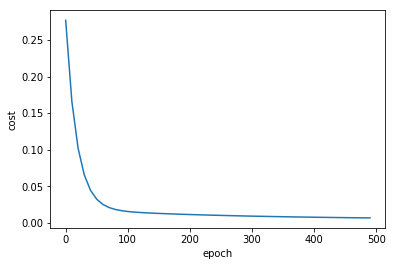

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [11]:
df.shape[1],np.ones(df.shape[1]),df.shape[0],np.ones(shape=(2)),-(2/df.shape[0])

(3, array([1., 1., 1.]), 20, array([1., 1.]), -0.1)

In [12]:
scaled_X,scaled_X.T#my row got converted into columns

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
         0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
         0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
         0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
        [0.25      , 0.75      , 0.5     

In [13]:
np.dot(np.ones(shape=(2)),scaled_X.T)#w1*area+w2*bedrooms

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [14]:
(scaled_X.T.dot(scaled_y-np.dot(np.ones(shape=(2)),scaled_X.T)))

array([[  1.86705708,  -5.40576409,  -0.82685029,  -1.02360999,
          1.51726207,   1.59013603,  -5.72640951,  -7.10615648,
         -0.51106314,  -9.83892996,  -1.70133781,  -5.85515351,
          2.00308847,   1.76017527,  -2.7944472 ,   1.57799037,
         -0.19527598,  -1.06976349,  -4.05759584,   4.25003556],
       [  1.43465709,  -8.37327395,  -2.19827395,  -2.46361877,
          0.96293295,   1.06120881,  -8.80568774, -10.66637739,
         -1.77241188, -14.35172222,  -3.37758429,  -8.97930843,
          1.61810536,   1.29051916,  -4.85172222,   1.0448295 ,
         -1.34654981,  -2.52586015,  -6.5551705 ,   4.64827778]])

In [15]:
scaled_y-np.dot(np.ones(shape=(2)),scaled_X.T)#w1*area+w2*bedrooms

array([[-2.85905492e-01, -1.31831928e+00, -6.68319285e-01,
        -6.96250319e-01, -3.35560664e-01, -3.25215837e-01,
        -1.36383653e+00, -1.55969860e+00, -6.23491699e-01,
        -1.94762963e+00, -7.92457216e-01, -1.38211239e+00,
        -2.66595147e-01, -3.01077905e-01, -9.47629630e-01,
        -3.26939974e-01, -5.78664112e-01, -7.02802043e-01,
        -1.12693997e+00,  5.23703704e-02],
       [ 3.13575990e-01, -7.18837803e-01, -6.88378033e-02,
        -9.67688378e-02,  2.63920817e-01,  2.74265645e-01,
        -7.64355045e-01, -9.60217114e-01, -2.40102171e-02,
        -1.34814815e+00, -1.92975734e-01, -7.82630907e-01,
         3.32886335e-01,  2.98403576e-01, -3.48148148e-01,
         2.72541507e-01,  2.08173691e-02, -1.03320562e-01,
        -5.27458493e-01,  6.51851852e-01],
       [-1.16053640e-01, -1.14846743e+00, -4.98467433e-01,
        -5.26398467e-01, -1.65708812e-01, -1.55363985e-01,
        -1.19398467e+00, -1.38984674e+00, -4.53639847e-01,
        -1.77777778e+00, -6.2

In [16]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    print([[scaled_X]])
    print([[scaled_X]][0])
    print([[scaled_X]][0][0])
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    print([[scaled_price]])
    return sy.inverse_transform([[scaled_price]])[0][0]#These scaler expect 2 dimensional array

predict(2600,4,w,b)

[[array([0.62068966, 0.75      ])]]
[array([0.62068966, 0.75      ])]
[0.62068966 0.75      ]
[[0.7144803261679701]]


128.45484403267596

In [17]:
w

array([0.70712464, 0.67456527])

In [18]:
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randit gives random number between two numbers specified in the argument

0

In [19]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]#Randomly picks index number dont go through all
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)
w_sgd, b_sgd, cost_sgd

(array([0.7052474 , 0.67385669]), -0.23037595497839441, 0.00026876556448148225)

In [20]:
scaled_X[random.randint(0,scaled_X.shape[0]-1)]#Randomly picks index number dont go through all

array([0.67931034, 0.5       ])

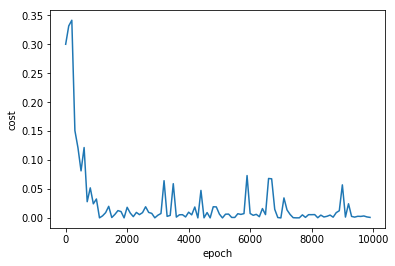

In [21]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [22]:
predict(2600,4,w_sgd, b_sgd)#predicting home price with stocastic weights and biasness

[[array([0.62068966, 0.75      ])]]
[array([0.62068966, 0.75      ])]
[0.62068966 0.75      ]
[[0.7127563310842642]]


128.22210469637565

In [23]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [24]:
 np.dot(np.ones(shape=(scaled_X.shape[1])), scaled_X.T)

array([0.33827586, 1.37068966, 0.72068966, 0.74862069, 0.38793103,
       0.37758621, 1.4162069 , 1.61206897, 0.67586207, 2.        ,
       0.84482759, 1.43448276, 0.31896552, 0.35344828, 1.        ,
       0.37931034, 0.63103448, 0.75517241, 1.17931034, 0.        ])

In [25]:
scaled_X.T.dot(2)

array([[0.17655172, 1.24137931, 0.44137931, 0.49724138, 0.27586207,
        0.25517241, 1.33241379, 1.72413793, 0.35172414, 2.        ,
        0.68965517, 1.36896552, 0.13793103, 0.20689655, 1.        ,
        0.25862069, 0.26206897, 0.51034483, 1.35862069, 0.        ],
       [0.5       , 1.5       , 1.        , 1.        , 0.5       ,
        0.5       , 1.5       , 1.5       , 1.        , 2.        ,
        1.        , 1.5       , 0.5       , 0.5       , 1.        ,
        0.5       , 1.        , 1.        , 1.        , 0.        ]])

In [26]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])